In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

# Country population

In [2]:
df_country_population_verify = pd.read_csv('archive/country_population_verify.csv', skiprows=3)
df_country_population_verify.shape

(266, 67)

In [3]:
df_country_population_verify = df_country_population_verify.loc[:, ('Country Name', '2017', '2018')]
df_country_population_verify.shape

(266, 3)

In [4]:
df_country_population_verify = df_country_population_verify.dropna()
df_country_population_verify.shape

(264, 3)

In [5]:
df_country_population = pd.read_csv('archive/country_population.csv')
df_country_population.shape

(264, 61)

In [6]:
random_countries = []
np.random.seed(42)
count = 0
while (count <= 9):
    r = np.random.randint(0,len(df_country_population_verify)-1)
    if df_country_population_verify.iloc[r, 0] not in random_countries and df_country_population_verify.iloc[r, 0] in df_country_population['Country Name'].to_numpy():
        random_countries.append(df_country_population_verify.iloc[r, 0])
        count += 1

# Preprocessing

In [7]:
df_country_population = df_country_population.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [8]:
print(f"Countries missing -> {df_country_population.isna()['Country Name'].sum()}")
print(f"Cells missing {df_country_population.isna().sum().sum()}")

Countries missing -> 0
Cells missing 163


In [9]:
X = df_country_population.loc[:, ~df_country_population.columns.isin(['Country Name'])]

In [10]:
y = df_country_population.loc[:, ('Country Name')]

In [11]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = pd.DataFrame(data = imp.fit_transform(X), columns=X.columns)

In [12]:
X.isna().sum().sum()

0

IDA & IBRD total:
Predictions:
2017 -> 6298678119
2018 -> 6371581467
Actual data:
2017 -> 6343292514
2018 -> 6420905201
Statistics:
--------------------------
The RVE is:  0.9987693801087192
The rmse is:  47028050.01761598
The Maximum Error is is:  49323734
The Mean Absolute Error is:  46969064.5
--------------------------
IDA only:
Predictions:
2017 -> 984914526
2018 -> 999013338
Actual data:
2017 -> 1060401803
2018 -> 1084433733
Statistics:
--------------------------
The RVE is:  0.9726750060390323
The rmse is:  80606987.50986403
The Maximum Error is is:  85420395
The Mean Absolute Error is:  80453836.0
--------------------------
Ethiopia:
Predictions:
2017 -> 92943395
2018 -> 94359733
Actual data:
2017 -> 106399926
2018 -> 109224410
Statistics:
--------------------------
The RVE is:  0.9475344065089812
The rmse is:  14178096.643560624
The Maximum Error is is:  14864677
The Mean Absolute Error is:  14160604.0
--------------------------
Poland:
Predictions:
2017 -> 40416367
2018 -> 40

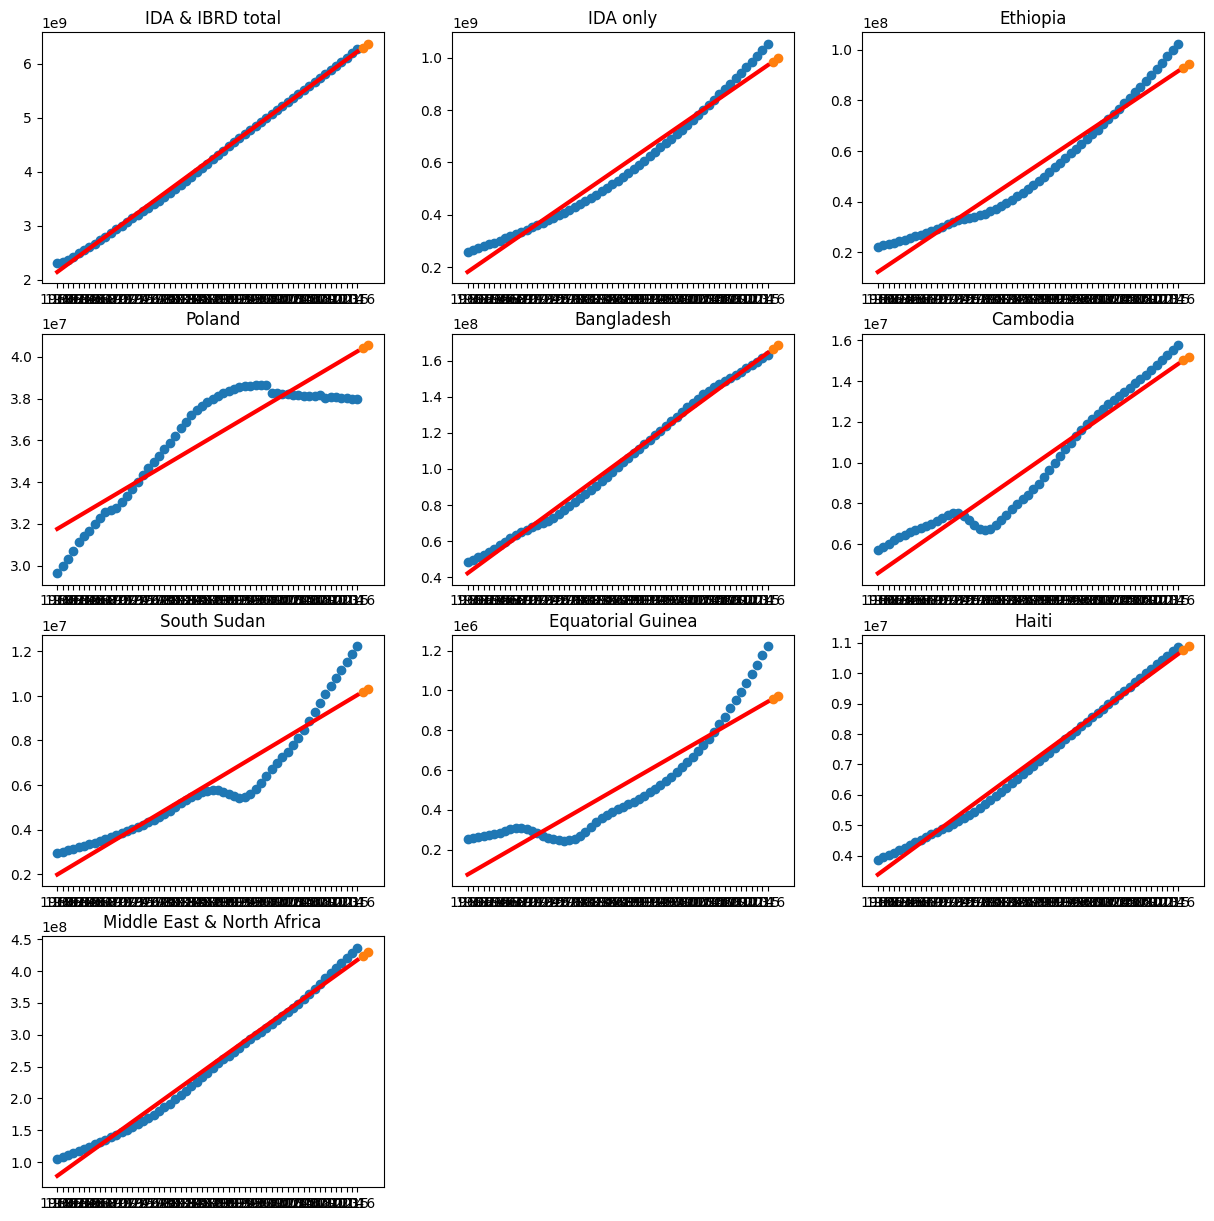

In [13]:
plt.figure(figsize=(15,15))
        
for idx, val in enumerate(random_countries):
    plt.subplot(4, 3, idx + 1)
    index = y[y == val].index[0]
    model = LinearRegression().fit(X.columns.to_numpy().reshape(-1,1), X.loc[index, :].to_numpy())
    print(f"{val}:")
    print("Predictions:")
    y_pred = np.round(model.predict([[2017]])).astype('int')
    y_pred1 = np.round(model.predict([[2018]])).astype('int')
    preds = model.predict(X.columns.to_numpy().reshape(-1,1))
    print(f"2017 -> {y_pred[0]}\n2018 -> {y_pred1[0]}")
    print("Actual data:")
    actual_2017 = df_country_population_verify.loc[df_country_population_verify['Country Name'] == val]['2017'].item()
    actual_2018 = df_country_population_verify.loc[df_country_population_verify['Country Name'] == val]['2018'].item()
    both_2017_2018 = df_country_population_verify.loc[df_country_population_verify['Country Name'] == val].iloc[0, 1:3]
    print(f"2017 -> {int(actual_2017)}\n2018 -> {int(actual_2018)}")
    print(f"Statistics:\n--------------------------")
    tmp = list(map(int, both_2017_2018))
    rve = explained_variance_score(np.concatenate((X.loc[index, :].to_numpy(), tmp), axis=None), np.concatenate((preds, np.array([y_pred[0], y_pred1[0]])), axis=None))
    print("The RVE is: ", rve)
    print("The rmse is: ", mean_squared_error(tmp, [y_pred, y_pred1], squared=False)) 
    print("The Maximum Error is is: ", max_error(tmp, [y_pred, y_pred1]))
    print("The Mean Absolute Error is: ", mean_absolute_error(tmp, [y_pred, y_pred1]))
    print("--------------------------")
    plt.scatter(X.columns, X.iloc[index, :].to_numpy())
    plt.scatter([57, 58], [y_pred[0], y_pred1[0]])
    plt.title(val)
    plt.plot(X.columns, preds, c='r', linewidth=3)
plt.show()

# Fertility rate

In [14]:
df_fertility_rate_verify = pd.read_csv('archive/fertility_rate_verify.csv', skiprows=3)
df_fertility_rate_verify.shape

(266, 67)

In [15]:
df_fertility_rate_verify = df_fertility_rate_verify.loc[:, ('Country Name', '2017', '2018')]
df_fertility_rate_verify.shape

(266, 3)

In [16]:
df_fertility_rate_verify = df_fertility_rate_verify.dropna()
df_fertility_rate_verify.shape

(248, 3)

In [17]:
df_fertility_rate = pd.read_csv('archive/fertility_rate.csv')
df_fertility_rate.shape

(264, 61)

In [18]:
random_countries = []
np.random.seed(42)
count = 0
while (count <= 9):
    r = np.random.randint(0,len(df_fertility_rate_verify)-1)
    if df_fertility_rate_verify.iloc[r, 0] not in random_countries and df_fertility_rate_verify.iloc[r, 0] in df_fertility_rate['Country Name'].to_numpy():
        random_countries.append(df_fertility_rate_verify.iloc[r, 0])
        count += 1

# Preprocessing

In [19]:
df_fertility_rate = df_fertility_rate.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [20]:
print(f"Countries missing -> {df_fertility_rate.isna()['Country Name'].sum()}")
print(f"Cells missing -> {df_fertility_rate.isna().sum().sum()}")

Countries missing -> 0
Cells missing -> 1278


In [21]:
X = df_fertility_rate.loc[:, ~df_fertility_rate.columns.isin(['Country Name'])]

In [22]:
y = df_fertility_rate.loc[:, ('Country Name')]

In [23]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = pd.DataFrame(data = imp.fit_transform(X), columns=X.columns)

In [24]:
X.isna().sum().sum()

0

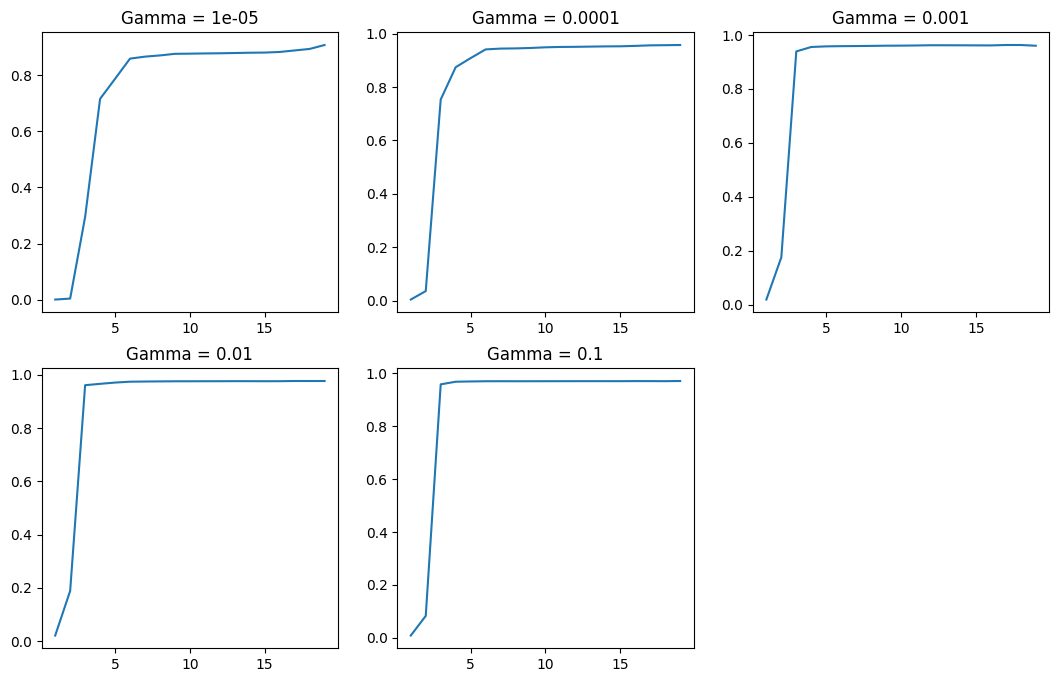

In [25]:
plt.figure(figsize=(13,8))
acc_scores = []
bestValue = 0
bestC = 0
bestGamma = 0
acc_tr = []
cs = [0.001, 0.01, 1, 10, 100, 500, 750, 1000, 2000, 3000, 5000, 6000, 7500, 
      9000, 10000, 15000, 30000, 45000, 100000]
g = [0.00001, 0.0001, 0.001, 0.01, 0.1]

for i, e in enumerate(g):
    plt.subplot(2,3,i + 1)
    plt.title("Gamma = " + str(e)) 
    for j in cs:
        for idx, val in enumerate(random_countries):
            index = y[y == val].index[0]
            model = SVR(C=j, kernel='rbf', gamma=e).fit(X.columns.to_numpy().reshape(-1,1), X.loc[index, :])
            y_pred = model.predict([[2017]])
            y_pred1 = model.predict([[2018]])
            preds = model.predict(X.columns.to_numpy().reshape(-1,1))
            both_2017_2018 = df_fertility_rate_verify.loc[df_fertility_rate_verify['Country Name'] == val].iloc[0, 1:3]
            tmp = list(both_2017_2018)
            rve = explained_variance_score(np.concatenate((X.loc[index, :].to_numpy(), tmp), axis=None), np.concatenate((preds, np.array([y_pred[0], y_pred1[0]])), axis=None))
            acc_tr.append(rve)
        acc = np.sum(np.array(acc_tr))/10
        acc_scores.append(acc)
        acc_tr = []
        if acc > bestValue:
            bestC = j
            bestGamma = e
            bestValue = acc
    plt.plot(range(1,len(acc_scores)+1,1), acc_scores)
    acc_scores=[]

plt.show()

In [26]:
print(bestC)
print(bestGamma)
print(bestValue)

100000
0.01
0.9765377924622347


IDA only:
Predictions:
2017 -> 4.157108823126984
2018 -> 4.215535697193224
Actual data:
2017 -> 3.96861812356812
2018 -> 3.91585153154177
Statistics:
--------------------------
The RVE is:  0.9925245403591457
The rmse is:  0.25033911296718914
The Maximum Error is is:  0.29968416565145395
The Mean Absolute Error is:  0.2440874326051592
--------------------------
Puerto Rico:
Predictions:
2017 -> 1.4242020769659585
2018 -> 1.4654816600574367
Actual data:
2017 -> 1.101
2018 -> 1.035
Statistics:
--------------------------
The RVE is:  0.9879975360141445
The rmse is:  0.3806402778220639
The Maximum Error is is:  0.4304816600574368
The Mean Absolute Error is:  0.37684186851169765
--------------------------
Honduras:
Predictions:
2017 -> 2.6300494598138826
2018 -> 2.737162099213313
Actual data:
2017 -> 2.496
2018 -> 2.46
Statistics:
--------------------------
The RVE is:  0.997779967519219
The rmse is:  0.2177017304900494
The Maximum Error is is:  0.27716209921331325
The Mean Absolute Error i

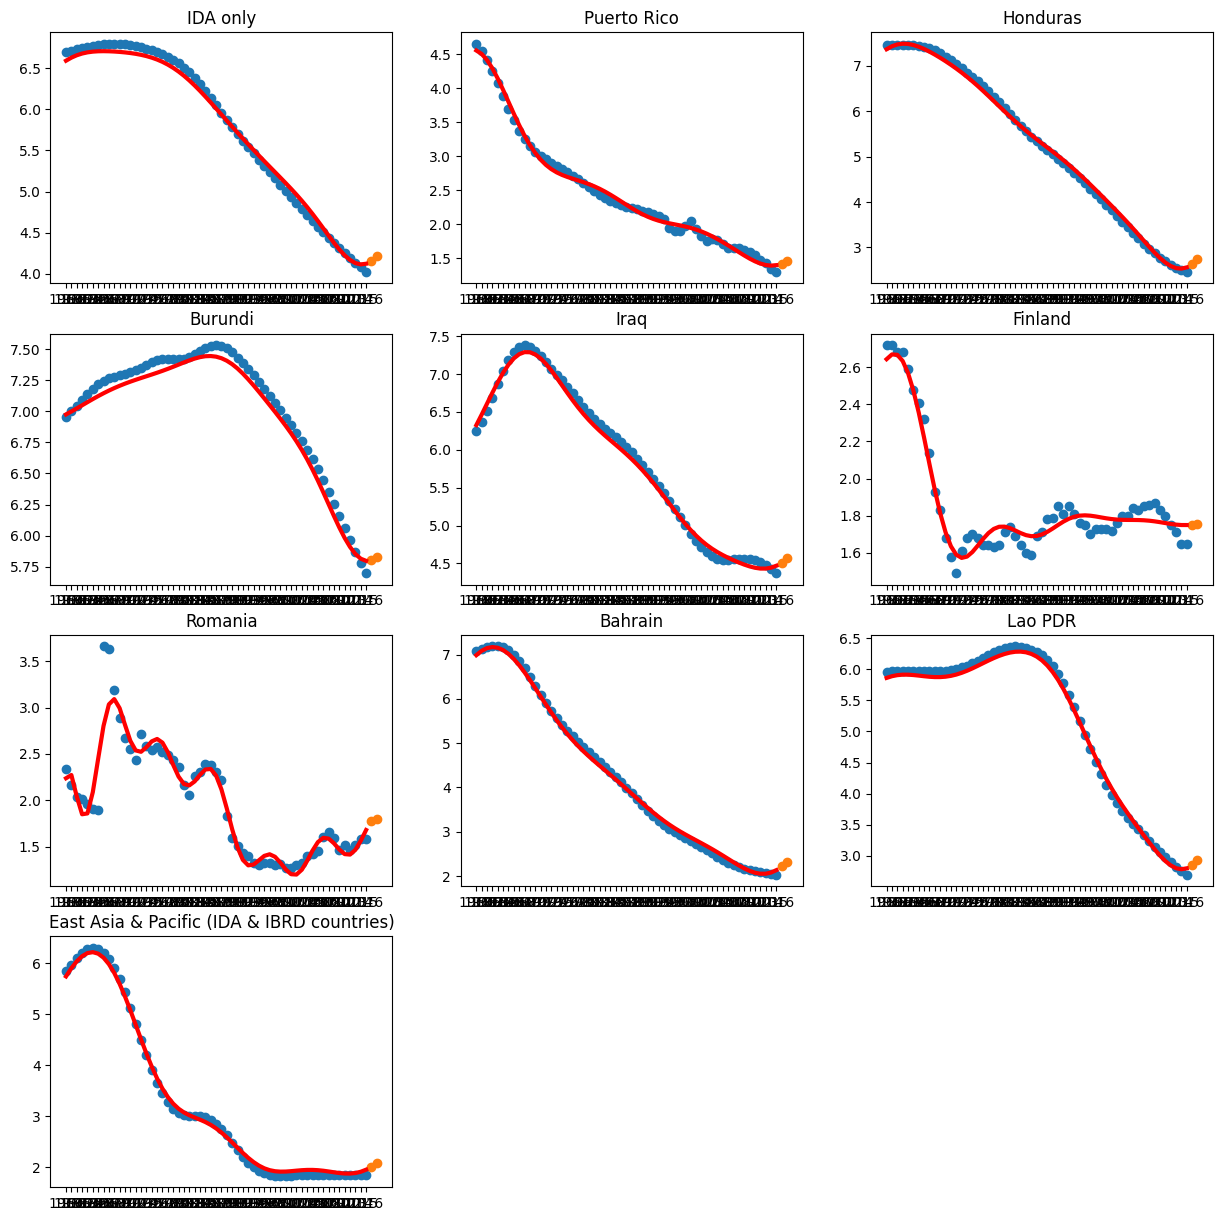

In [27]:
# Best model
plt.figure(figsize=(15,15))
        
for idx, val in enumerate(random_countries):
    plt.subplot(4, 3, idx + 1)
    index = y[y == val].index[0]
    model = SVR(C=100000, gamma=0.01).fit(X.columns.to_numpy().reshape(-1,1), X.loc[index, :].to_numpy())
    print(f"{val}:")
    print("Predictions:")
    y_pred = model.predict([[2017]])
    y_pred1 = model.predict([[2018]])
    preds = model.predict(X.columns.to_numpy().reshape(-1,1))
    print(f"2017 -> {y_pred[0]}\n2018 -> {y_pred1[0]}")
    print("Actual data:")
    actual_2017 = df_fertility_rate_verify.loc[df_fertility_rate_verify['Country Name'] == val]['2017'].item()
    actual_2018 = df_fertility_rate_verify.loc[df_fertility_rate_verify['Country Name'] == val]['2018'].item()
    both_2017_2018 = df_fertility_rate_verify.loc[df_fertility_rate_verify['Country Name'] == val].iloc[0, 1:3]
    print(f"2017 -> {actual_2017}\n2018 -> {actual_2018}")
    print(f"Statistics:\n--------------------------")
    tmp = list(both_2017_2018)
    rve = explained_variance_score(np.concatenate((X.loc[index, :].to_numpy(), tmp), axis=None), np.concatenate((preds, np.array([y_pred[0], y_pred1[0]])), axis=None))
    print("The RVE is: ", rve)
    print("The rmse is: ", mean_squared_error(tmp, [y_pred, y_pred1], squared=False)) 
    print("The Maximum Error is is: ", max_error(tmp, [y_pred, y_pred1]))
    print("The Mean Absolute Error is: ", mean_absolute_error(tmp, [y_pred, y_pred1]))
    print("--------------------------")
    plt.scatter(X.columns, X.iloc[index, :].to_numpy())
    plt.scatter([57, 58], [y_pred[0], y_pred1[0]])
    plt.title(val)
    plt.plot(X.columns, preds, c='r', linewidth=3)
plt.show()

# Life expectancy

In [28]:
df_life_expectancy_verify = pd.read_csv('archive/life_expectancy_verify.csv', skiprows=3)
df_life_expectancy_verify.shape

(266, 67)

In [29]:
df_life_expectancy_verify = df_life_expectancy_verify.loc[:, ('Country Name', '2017', '2018')]
df_life_expectancy_verify.shape

(266, 3)

In [30]:
df_life_expectancy_verify = df_life_expectancy_verify.dropna()
df_life_expectancy_verify.shape

(247, 3)

In [31]:
df_life_expectancy = pd.read_csv('archive/life_expectancy.csv')
df_life_expectancy.shape

(264, 61)

In [32]:
random_countries = []
np.random.seed(42)
count = 0
while (count <= 9):
    r = np.random.randint(0,len(df_life_expectancy_verify)-1)
    if df_life_expectancy_verify.iloc[r, 0] not in random_countries and df_life_expectancy_verify.iloc[r, 0] in df_life_expectancy['Country Name'].to_numpy():
        random_countries.append(df_life_expectancy_verify.iloc[r, 0])
        count += 1

# Preprocessing

In [33]:
df_life_expectancy = df_life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [34]:
print(f"Countries missing -> {df_life_expectancy.isna()['Country Name'].sum()}")
print(f"Cells missing -> {df_life_expectancy.isna().sum().sum()}")

Countries missing -> 0
Cells missing -> 1301


In [35]:
X = df_life_expectancy.loc[:, ~df_life_expectancy.columns.isin(['Country Name'])]

In [36]:
y = df_life_expectancy.loc[:, ('Country Name')]

In [37]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = pd.DataFrame(data = imp.fit_transform(X), columns=X.columns)

In [38]:
X.isna().sum().sum()

0

The RVE is:  0.9665738960553456
The rmse is:  0.40925483723798856
The Maximum Error is is:  0.431556049069556
The Mean Absolute Error is:  0.4086111260220875
--------------------------
The RVE is:  0.8918609929221567
The rmse is:  0.966878187372504
The Maximum Error is is:  1.0283090451360763
The Mean Absolute Error is:  0.9647894541159623
--------------------------
The RVE is:  0.9995502632564106
The rmse is:  3.861641218560192
The Maximum Error is is:  3.8653400664685904
The Mean Absolute Error is:  3.8616394454022718
--------------------------
The RVE is:  0.9980724294620382
The rmse is:  0.561295949965489
The Maximum Error is is:  0.5656691896043071
The Mean Absolute Error is:  0.5612787789880187
--------------------------
The RVE is:  0.9880783401176305
The rmse is:  2.867963728793714
The Maximum Error is is:  2.8728184057512323
The Mean Absolute Error is:  2.867959613001787
--------------------------
The RVE is:  0.9369275164917029
The rmse is:  3.028443443472848
The Maximum Erro

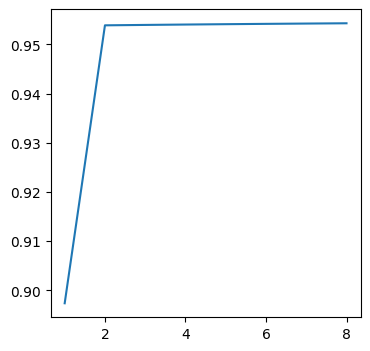

In [39]:
plt.figure(figsize=(4,4))
rve_score = []
rve_scores = []
rve = 0

for i, d in enumerate(range(2, 10)):
    for idx, val in enumerate(random_countries):
        index = y[y == val].index[0]
        model = PolynomialFeatures(degree=d).fit_transform(X.columns.to_numpy().reshape(-1,1))
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(model, X.loc[index, :].to_numpy())
        y_pred = poly_reg_model.predict(PolynomialFeatures(degree=d).fit_transform(([[2017]])))
        y_pred1 = poly_reg_model.predict(PolynomialFeatures(degree=d).fit_transform(([[2018]])))
        preds = poly_reg_model.predict(model)
        actual_2017 = df_life_expectancy_verify.loc[df_life_expectancy_verify['Country Name'] == val]['2017'].item()
        actual_2018 = df_life_expectancy_verify.loc[df_life_expectancy_verify['Country Name'] == val]['2018'].item()
        both_2017_2018 = df_life_expectancy_verify.loc[df_life_expectancy_verify['Country Name'] == val].iloc[0, 1:3]
        tmp = list(both_2017_2018)
        rve = explained_variance_score(np.concatenate((X.loc[index, :].to_numpy(), tmp), axis=None), np.concatenate((preds, np.array([y_pred[0], y_pred1[0]])), axis=None))
        print("The RVE is: ", explained_variance_score(tmp, [y_pred[0], y_pred1[0]]))
        print("The rmse is: ", mean_squared_error(tmp, [y_pred[0], y_pred1[0]], squared=False)) 
        print("The Maximum Error is is: ", max_error(tmp, [y_pred[0], y_pred1[0]]))
        print("The Mean Absolute Error is: ", mean_absolute_error(tmp, [y_pred[0], y_pred1[0]]))
        print("--------------------------")
        rve_score.append(rve)
    rve_scores.append(np.sum(np.array(rve_score)) / 10)  
    rve_score = []
plt.plot(range(1,len(rve_scores)+1,1), rve_scores)
plt.show()

India:
Predictions:
2017 -> 69.32177594903624
2018 -> 69.74038666882552
Actual data:
2017 -> 69.165
2018 -> 69.416
Statistics:
--------------------------
The RVE is:  0.9993978783941702
The rmse is:  0.25476009215331563
The Maximum Error is is:  0.32438666882552525
The Mean Absolute Error is:  0.24058130893087792
--------------------------
Heavily indebted poor countries (HIPC):
Predictions:
2017 -> 64.09093647240661
2018 -> 65.09474705555476
Actual data:
2017 -> 62.748671772017
2018 -> 63.1349911561301
Statistics:
--------------------------
The RVE is:  0.9932189459597622
The rmse is:  1.6796305711735826
The Maximum Error is is:  1.959755899424664
The Mean Absolute Error is:  1.6510102999071385
--------------------------
Burundi:
Predictions:
2017 -> 58.400081255007535
2018 -> 59.02305641700514
Actual data:
2017 -> 60.898
2018 -> 61.247
Statistics:
--------------------------
The RVE is:  0.9786789553027837
The rmse is:  2.36490201878733
The Maximum Error is is:  2.497918744992468
The 

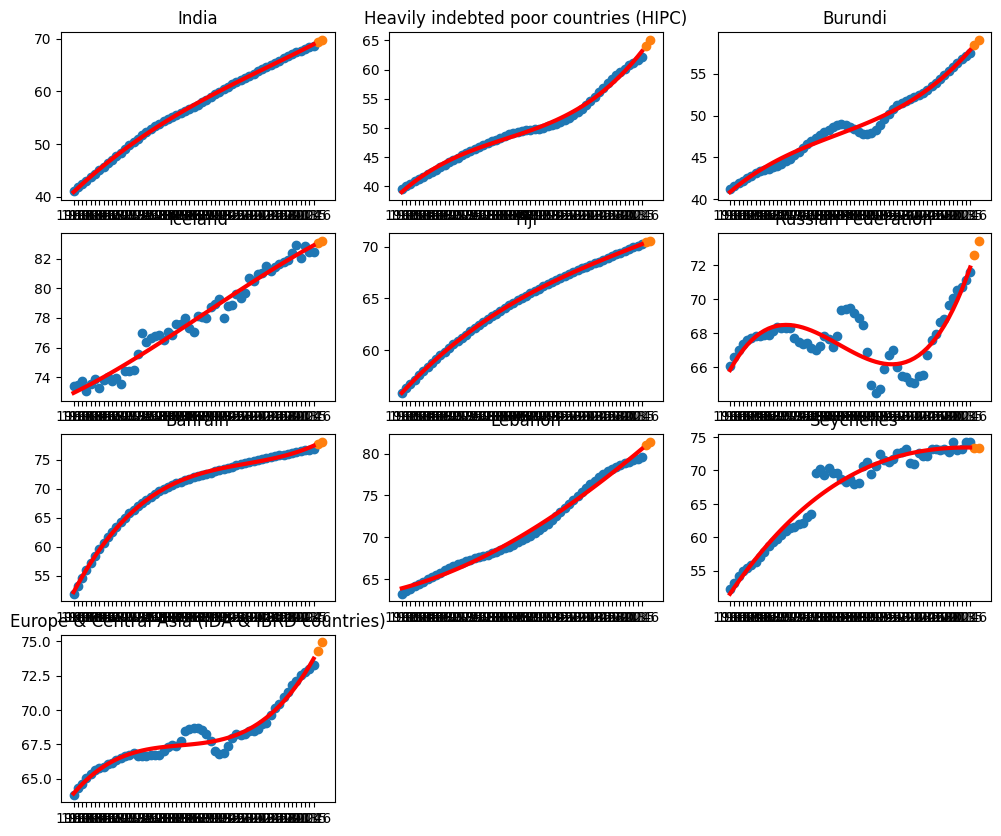

In [40]:
# Best model
plt.figure(figsize=(12,10))

for idx, val in enumerate(random_countries):
    plt.subplot(4, 3, idx + 1)
    index = y[y == val].index[0]
    model = PolynomialFeatures(degree=3).fit_transform(X.columns.to_numpy().reshape(-1,1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(model, X.loc[index, :].to_numpy())
    print(f"{val}:")
    print("Predictions:")
    y_pred = poly_reg_model.predict(PolynomialFeatures(degree=3).fit_transform(([[2017]])))
    y_pred1 = poly_reg_model.predict(PolynomialFeatures(degree=3).fit_transform(([[2018]])))
    preds = poly_reg_model.predict(model)
    print(f"2017 -> {y_pred[0]}\n2018 -> {y_pred1[0]}")
    print("Actual data:")
    actual_2017 = df_life_expectancy_verify.loc[df_life_expectancy_verify['Country Name'] == val]['2017'].item()
    actual_2018 = df_life_expectancy_verify.loc[df_life_expectancy_verify['Country Name'] == val]['2018'].item()
    both_2017_2018 = df_life_expectancy_verify.loc[df_life_expectancy_verify['Country Name'] == val].iloc[0, 1:3]
    print(f"2017 -> {actual_2017}\n2018 -> {actual_2018}")
    print(f"Statistics:\n--------------------------")
    tmp = list(both_2017_2018)
    rve = explained_variance_score(np.concatenate((X.loc[index, :].to_numpy(), tmp), axis=None), np.concatenate((preds, np.array([y_pred[0], y_pred1[0]])), axis=None))
    print("The RVE is: ", rve)
    print("The rmse is: ", mean_squared_error(tmp, [y_pred[0], y_pred1[0]], squared=False)) 
    print("The Maximum Error is is: ", max_error(tmp, [y_pred[0], y_pred1[0]]))
    print("The Mean Absolute Error is: ", mean_absolute_error(tmp, [y_pred[0], y_pred1[0]]))
    print("--------------------------")
    plt.scatter(X.columns, X.iloc[index, :].to_numpy())
    plt.scatter([57, 58], [y_pred[0], y_pred1[0]])
    plt.title(val)
    plt.plot(X.columns, preds, c='r', linewidth=3)
plt.show()